In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Application of a GARCH Model on S&P500 price data for volatility forecasting

### First set up the data

In [8]:
# read SP500 data
spy = pd.read_csv('SP500.csv')

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,225.830002,223.880005,225.039993,225.240005,91366500.0,203.788071
1,2017-01-04,226.750000,225.610001,225.619995,226.580002,78744400.0,205.000427
2,2017-01-05,226.580002,225.479996,226.270004,226.399994,78379000.0,204.837555
3,2017-01-06,227.750000,225.899994,226.529999,227.210007,71559900.0,205.570404
4,2017-01-09,227.070007,226.419998,226.910004,226.460007,46939700.0,204.891861
...,...,...,...,...,...,...,...
1293,2022-02-22,435.500000,425.859985,431.890015,429.570007,124391800.0,424.653290
1294,2022-02-23,433.260010,421.350006,432.660004,421.950012,132578000.0,417.120514
1295,2022-02-24,428.760010,410.640015,411.019989,428.299988,213942900.0,423.397827
1296,2022-02-25,437.839996,427.859985,429.609985,437.750000,121804500.0,432.739655


In [12]:
# 1. calculate returns, use the adjusted close price


# 2. clean up NaN values


# 3. format the index to datetime



### Analyze the data

Text(0.5, 1.0, 'SPY Returns')

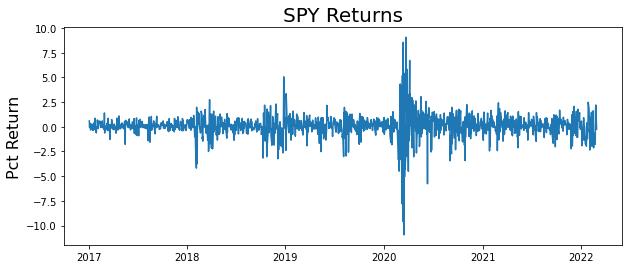

In [95]:
# visualize returns


> Observation: <br> We can see heteroscedasticity and volatility clustering

In [14]:
# fit model to calculate residuals (in this case simple de-meaning with OLS)


#get squared residuals



Text(0.5, 1.0, 'Squared Residuals')

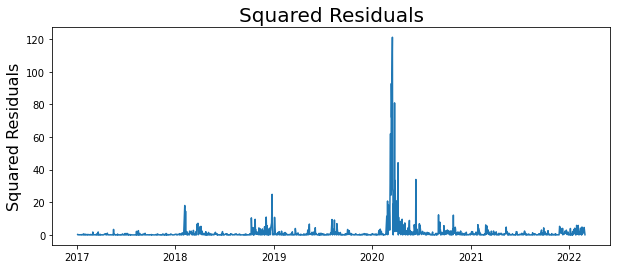

In [97]:
# visualize squared residuals (variance)


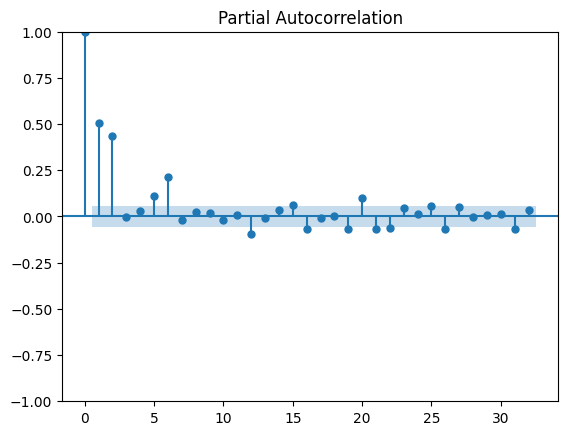

In [16]:
# analyze PACF of the squared resiuduals




### Fit the Model

In [17]:
# use this function
from arch import arch_model

# fit a GARCH model on the sample and inspect the significance of the coeffs
# hint: first research how to apply the imported ARCH model




Iteration:      5,   Func. Count:     45,   Neg. LLF: 2934.3032731335647
Iteration:     10,   Func. Count:     86,   Neg. LLF: 1581.6424333899342
Iteration:     15,   Func. Count:    120,   Neg. LLF: 1581.640108298122
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1581.640108298158
            Iterations: 15
            Function evaluations: 120
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1581.64
Distribution:                  Normal   AIC:                           3175.28
Method:            Maximum Likelihood   BIC:                           3206.29
                                        No. Observations:                 1297
Date:                Wed, Oct 19 2022   Df Residuals:                     1296
Time:                        13:09:18   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1060  1.854e-02      5.716  1.091e-08 [6.963e-02,  0.142]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0632  1.928e-02      3.278  1.045e-03 [2.541e-02,  0.101]
alpha[1]       0.2108  5.742e-02      3.671  2.415e-04 [9.825e-02,  0.323]
alpha[2]       0.2100  6.129e-02      3.426  6.132e-04 [8.984e-02,  0.330]
beta[1]        0.0481      0.115      0.419      0.675   [ -0.177,  0.273]
beta[2]        0.5045  8.797e-02      5.735  9.748e-09   [  0.332,  0.677]
==========================================================================

Covariance estimator: robust
"""

### Now the fun part: Volatility Forecasting 
We want to create a rolling forecast of conditional variance with an appropriate GARCH model

In [ ]:
# define start of the prediction
pred_start = datetime(2019,1,1)

# get dates for forecast


In [18]:
# set your arch model
# forecast from 1.1.2019 to the end
# access every new value from 2019 onwards through a loop
# for every new value fit the arch model again on all "historic values"
# forecast the next timestep and calculate the variance of the forecast
# save the forecast in an extra column of the SP500 dataframe



### Compare the forecast to actual values

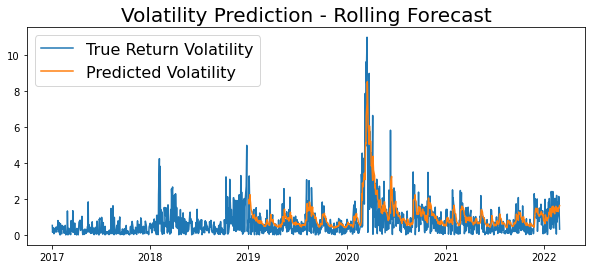

In [105]:
# plot true volatility (residuals) vs GARCH foracested volatility (vola = sqrt of variance)